## **Automatic Text-to-Knowledge Graph System**

### **1-Text Preprocessing**

In [29]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Return preprocessed text as a string
    return ' '.join(lemmatized_tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### **2-Entity Recognition**

In [30]:
import spacy

def extract_entities(text):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)

    entities = []
    for entity in doc.ents:
        entities.append((entity.text, entity.label_))

    return entities

### **3- Relationship Extraction**

In [31]:
import spacy

def extract_relationships(text):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)

    relationships = []
    for sentence in doc.sents:
        for token in sentence:
            if token.dep_ != 'punct' and token.head.dep_ != 'ROOT':
                relationships.append((token.head.text, token.text, token.dep_))

    return relationships

### **4-Graph Construction**

In [32]:
import networkx as nx

def construct_knowledge_graph(entities, relationships):
    graph = nx.DiGraph()

    # Add entities as nodes
    for entity in entities:
        graph.add_node(entity[0], label=entity[1])

    # Add relationships as edges
    for relationship in relationships:
        head_entity = relationship[0]
        dependent_entity = relationship[1]
        syntactic_relationship = relationship[2]

        graph.add_edge(head_entity, dependent_entity, label=syntactic_relationship)

    return graph

### **5-Visualization of Knowledge Graph**

In [33]:
import matplotlib.pyplot as plt

def visualize_knowledge_graph(graph):
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(graph)
    labels = nx.get_edge_attributes(graph, 'label')
    nx.draw_networkx(graph, pos, with_labels=True, node_size=1000, font_size=12, node_color='lightblue', edge_color='gray')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
    plt.axis('off')
    plt.show()

### **Implementation an example on the system**

**The example paragraph**

In [34]:
paragraph = "Apple Inc. is a technology company headquartered in Cupertino, California. It was founded by Steve Jobs, Steve Wozniak, and Ronald Wayne on April 1, 1976. The company designs, manufactures, and sells consumer electronics, computer software, and online services. Some of its popular products include the iPhone, iPad, Mac, and Apple Watch."


**1.Preprocess the paragraph**

In [35]:
preprocessed_paragraph = preprocess_text(paragraph)
print(preprocessed_paragraph)

Apple Inc. technology company headquartered Cupertino , California . founded Steve Jobs , Steve Wozniak , Ronald Wayne April 1 , 1976 . company design , manufacture , sell consumer electronics , computer software , online service . popular product include iPhone , iPad , Mac , Apple Watch .


**2.Extract entities from the preprocessed paragraph**

In [36]:
entities = extract_entities(preprocessed_paragraph)
print(entities)

[('Apple Inc.', 'ORG'), ('Cupertino', 'GPE'), ('California', 'GPE'), ('Steve Jobs', 'PERSON'), ('Steve Wozniak', 'PERSON'), ('Ronald Wayne', 'PERSON'), ('April 1 , 1976', 'DATE'), ('iPhone', 'ORG'), ('iPad', 'ORG'), ('Mac', 'PERSON'), ('Apple Watch', 'ORG')]


**3.Extract relationships**

In [37]:
relationships = extract_relationships(preprocessed_paragraph)
print(relationships)

[('Inc.', 'Apple', 'compound'), ('company', 'Inc.', 'compound'), ('company', 'technology', 'compound'), ('Cupertino', 'California', 'appos'), ('Jobs', 'Steve', 'compound'), ('Wozniak', 'Steve', 'compound'), ('Jobs', 'Wozniak', 'conj'), ('Wayne', 'Ronald', 'compound'), ('Wozniak', 'Wayne', 'conj'), ('Wayne', 'April', 'npadvmod'), ('April', '1', 'nummod'), ('April', '1976', 'nummod'), ('manufacture', 'sell', 'conj'), ('electronics', 'consumer', 'compound'), ('sell', 'electronics', 'dobj'), ('software', 'computer', 'compound'), ('electronics', 'software', 'conj'), ('service', 'online', 'amod'), ('product', 'popular', 'amod'), ('Watch', 'iPad', 'nmod'), ('iPad', 'Mac', 'conj'), ('Watch', 'Apple', 'compound'), ('iPhone', 'Watch', 'appos')]


**4.Graph Construction**

In [38]:
knowledge_graph = construct_knowledge_graph(entities, relationships)

**5.Visualization of Knowledge Graph**

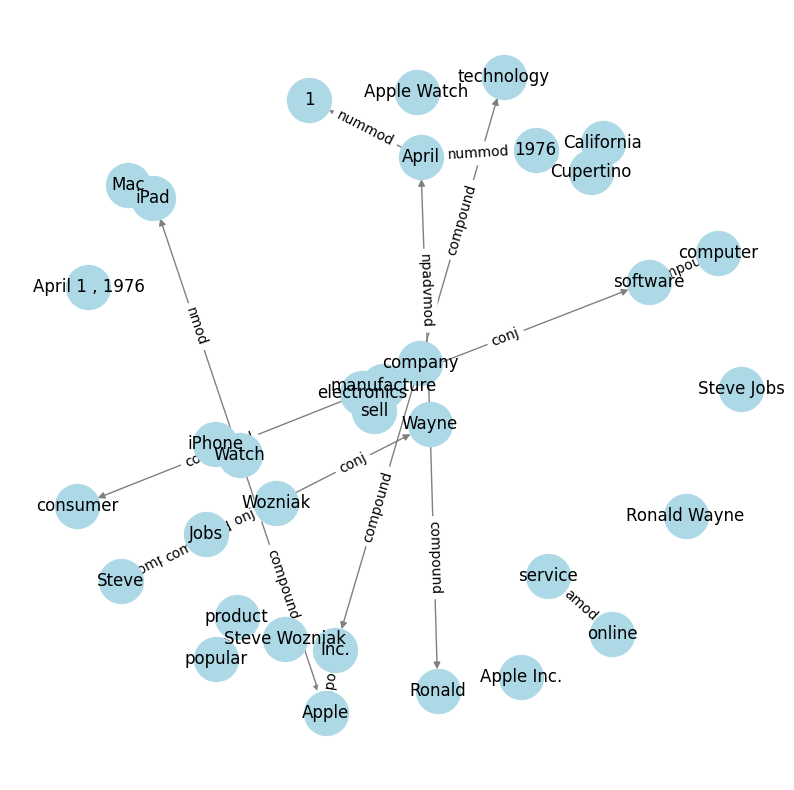

In [40]:
visualize_knowledge_graph(knowledge_graph)